In [9]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(1, '../src/')
from mythicwind.gps import *
from mythicwind.csv_io import *

from datetime import timedelta

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('notebook')

from glob import glob
from os import path
from multiprocessing import Pool

import vg

from collections import defaultdict

%matplotlib notebook

plt.style.use('notebook')

data_dir = '../data/turbines'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
turbines_gps_files = defaultdict(dict)

for turbine_dir in sorted(glob(path.join(data_dir, 'turbine-??'))):
    turbine = turbine_dir.split('/')[-1]
    for position in ('helihoist-1', 'sbittip', 'sbitroot'):
        position_dir = path.join(turbine_dir, position)
        if path.isdir(position_dir):
            print(f'processing {position_dir}')
            gps_file = path.join(position_dir, f'tom/gps/{turbine}_{position}_tom_gps.csv')
            if path.isfile(gps_file):
                print(f'found gps file: {gps_file}')
                turbines_gps_files[turbine][position] = read_frame(gps_file)
print('done!')

processing ../data/turbines/turbine-01/helihoist-1
found gps file: ../data/turbines/turbine-01/helihoist-1/tom/gps/turbine-01_helihoist-1_tom_gps.csv
processing ../data/turbines/turbine-02/helihoist-1
found gps file: ../data/turbines/turbine-02/helihoist-1/tom/gps/turbine-02_helihoist-1_tom_gps.csv
processing ../data/turbines/turbine-02/sbitroot
found gps file: ../data/turbines/turbine-02/sbitroot/tom/gps/turbine-02_sbitroot_tom_gps.csv
processing ../data/turbines/turbine-03/helihoist-1
found gps file: ../data/turbines/turbine-03/helihoist-1/tom/gps/turbine-03_helihoist-1_tom_gps.csv
processing ../data/turbines/turbine-03/sbittip
found gps file: ../data/turbines/turbine-03/sbittip/tom/gps/turbine-03_sbittip_tom_gps.csv
processing ../data/turbines/turbine-03/sbitroot
found gps file: ../data/turbines/turbine-03/sbitroot/tom/gps/turbine-03_sbitroot_tom_gps.csv
processing ../data/turbines/turbine-04/helihoist-1
found gps file: ../data/turbines/turbine-04/helihoist-1/tom/gps/turbine-04_heli

In [20]:
to_be_deleted = list()
# iterate over turbines and check if sbitroot, sbittip and helihoist-1 are present
for name, turbine in turbines_gps_files.items():
    if 'helihoist-1' in turbine and 'sbitroot' in turbine and 'sbittip' in turbine:
        print(f'valid dataset in {name}')
    else:
        print(f'deleting {name}')
        to_be_deleted.append(name)

for name in to_be_deleted:
    del(turbines_gps_files[name])

deleting turbine-02
valid dataset in turbine-03
valid dataset in turbine-04
valid dataset in turbine-05
valid dataset in turbine-06
valid dataset in turbine-07
valid dataset in turbine-08
valid dataset in turbine-09
valid dataset in turbine-10
valid dataset in turbine-11
valid dataset in turbine-12
valid dataset in turbine-13
valid dataset in turbine-14
valid dataset in turbine-15
valid dataset in turbine-16


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


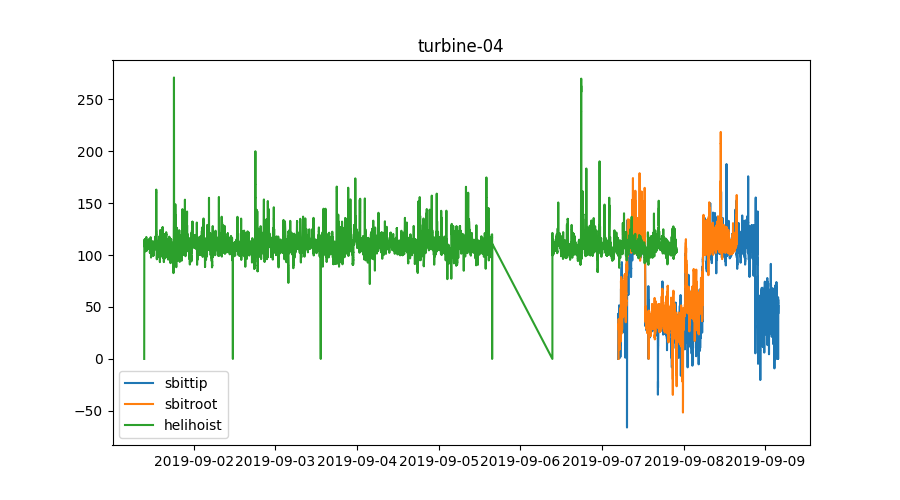

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


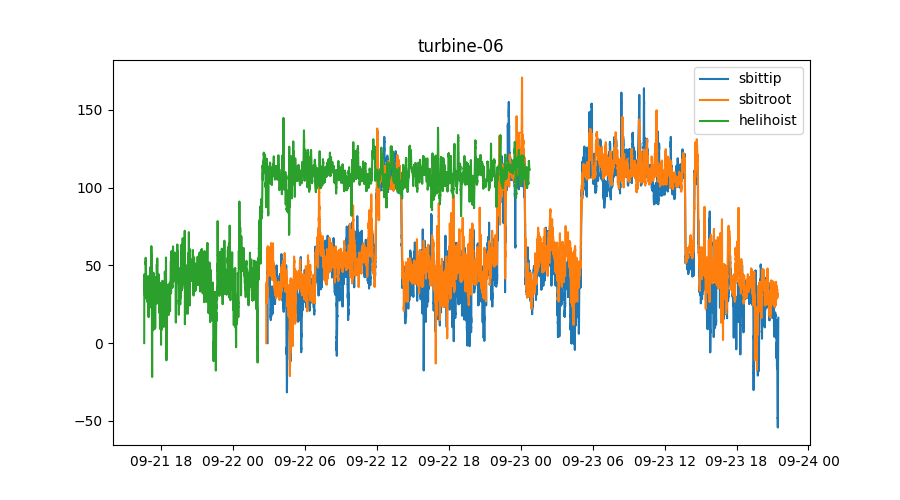

<IPython.core.display.Javascript object>


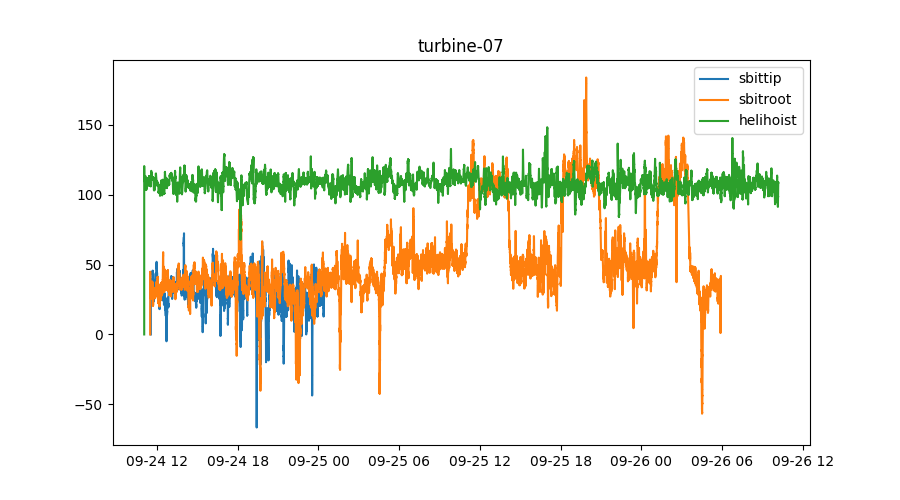

<IPython.core.display.Javascript object>


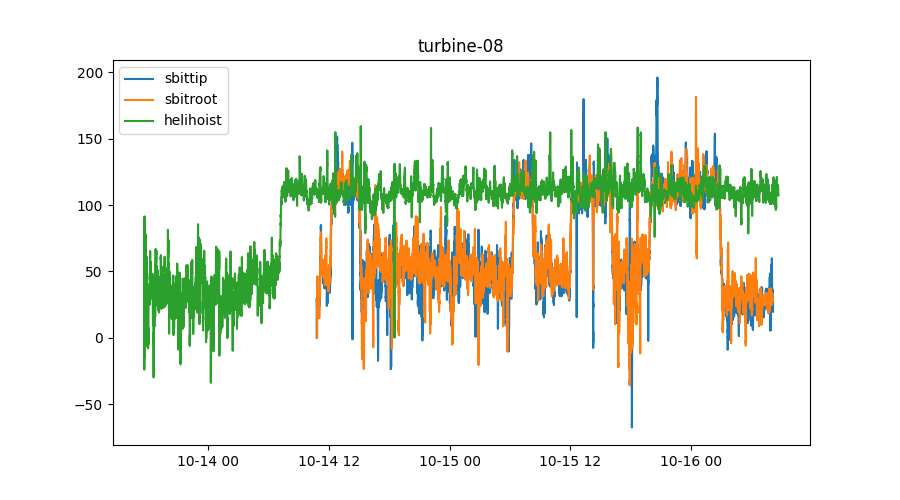

<IPython.core.display.Javascript object>


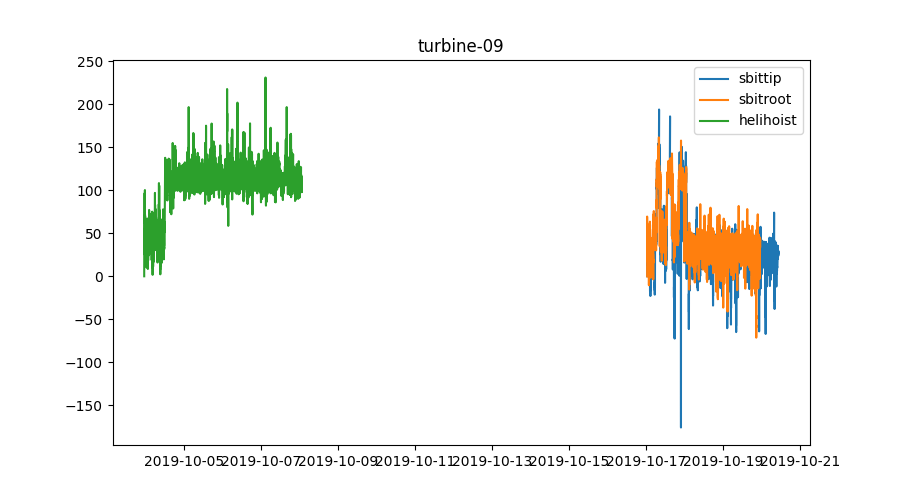

<IPython.core.display.Javascript object>


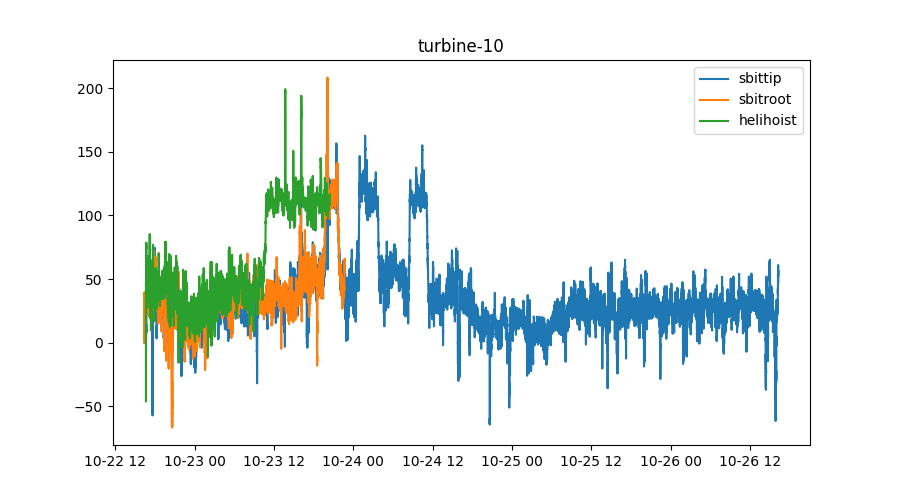

<IPython.core.display.Javascript object>


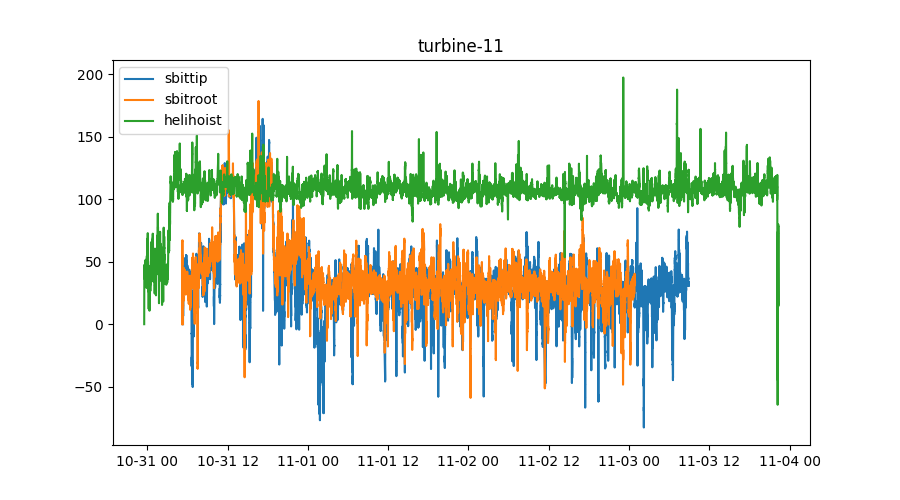

<IPython.core.display.Javascript object>


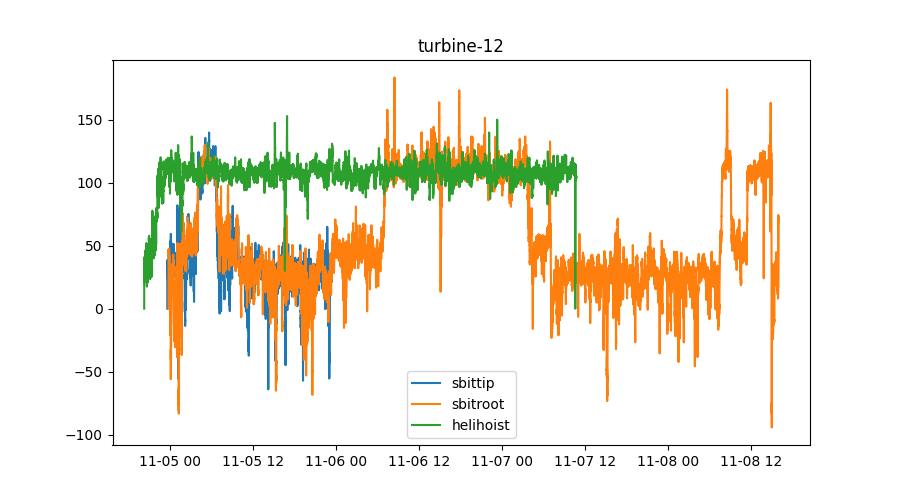

<IPython.core.display.Javascript object>


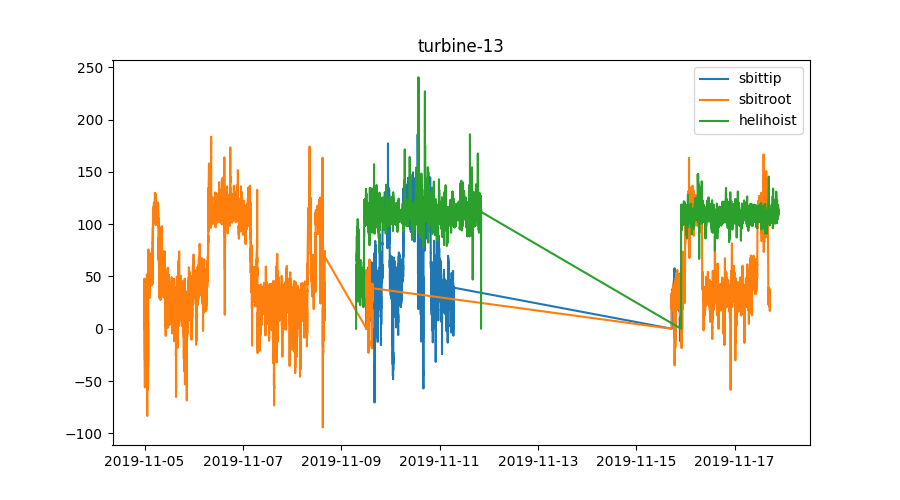

<IPython.core.display.Javascript object>


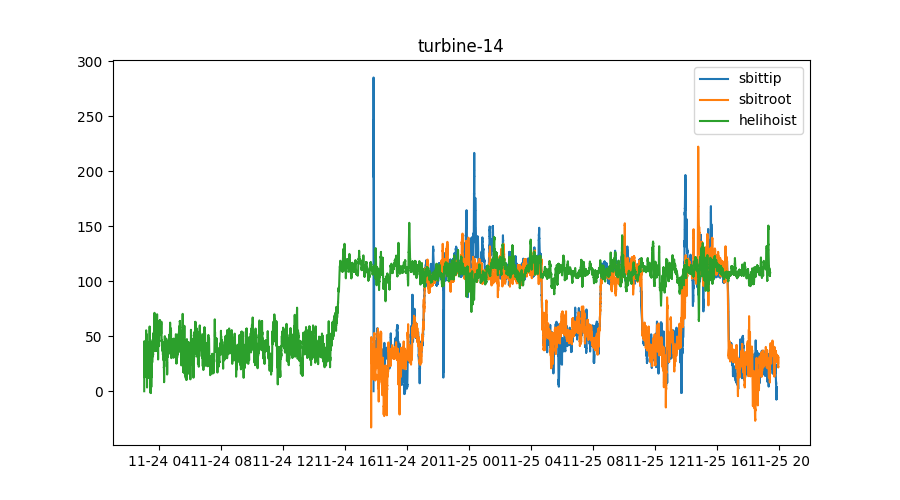

<IPython.core.display.Javascript object>


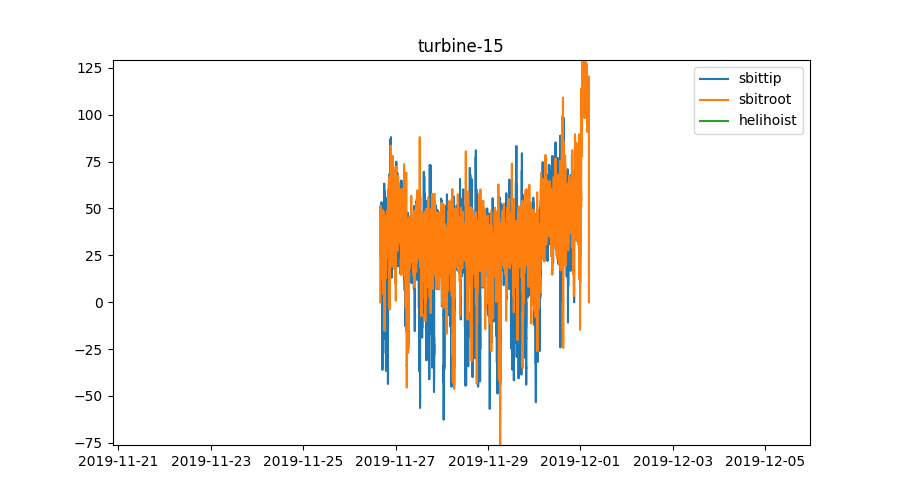

<IPython.core.display.Javascript object>


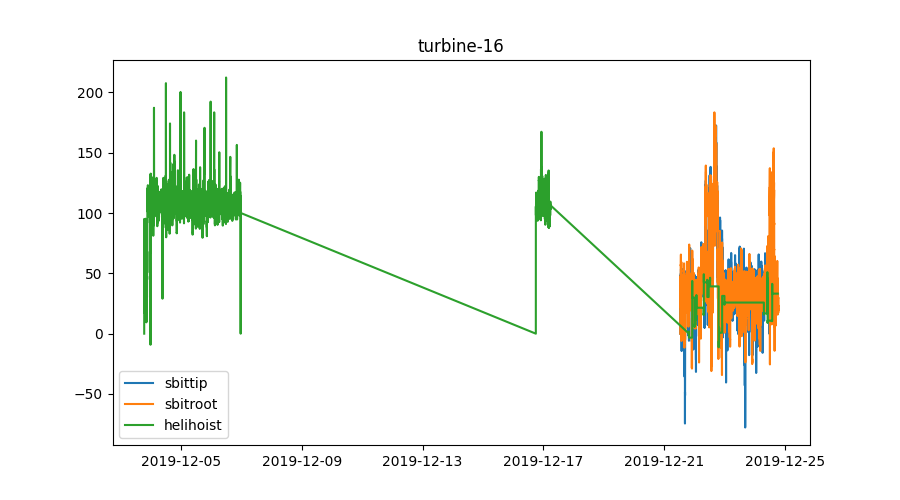

In [21]:
for name, turbine in turbines_gps_files.items():
    plt.figure()
    plt.title(name)
    plt.plot(turbine['sbittip'].altitude, label='sbittip')
    plt.plot(turbine['sbitroot'].altitude, label='sbitroot')
    plt.plot(turbine['helihoist-1'].altitude, label='helihoist')
    plt.legend()
    

turbine-03 single blade installation start 2019-08-25 17:00:00+00:00 to 2019-08-26 16:50:00+00:00
sbit vector: (0.00033950540806701804, -0.00023070257481799805)
nacelle orientation due north: 34


<IPython.core.display.Javascript object>


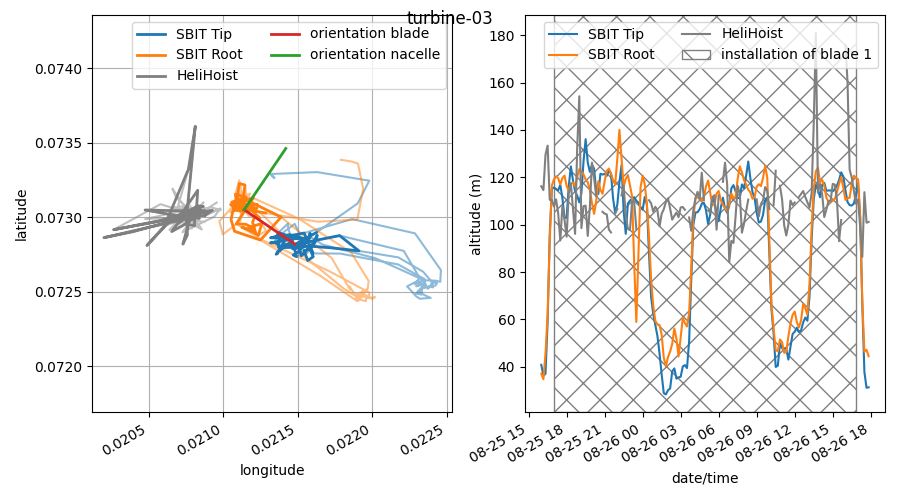

turbine-04 single blade installation start 2019-09-07 07:50:00+00:00 to 2019-09-07 12:30:00+00:00
sbit vector: (0.00026987455087951195, -0.0002918379830280926)
nacelle orientation due north: 47


<IPython.core.display.Javascript object>


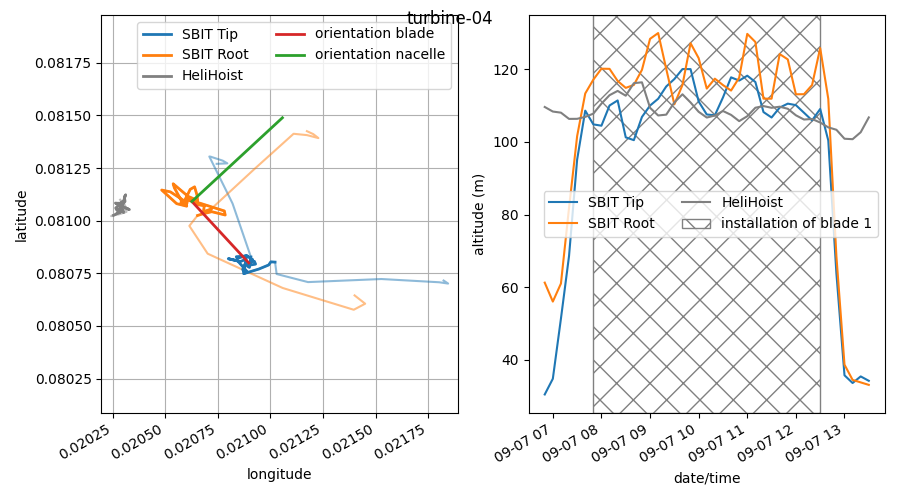

turbine-05 single blade installation start 2019-09-20 03:20:00+00:00 to 2019-09-20 18:40:00+00:00
sbit vector: (0.0003518755813191575, -0.0002189263735311031)
nacelle orientation due north: 32


<IPython.core.display.Javascript object>


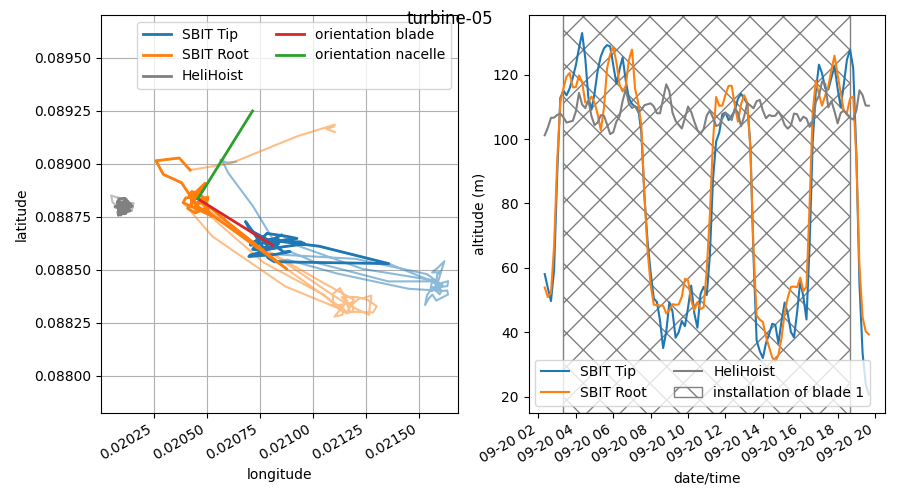

turbine-06 single blade installation start 2019-09-22 12:20:00+00:00 to 2019-09-23 00:00:00+00:00
sbit vector: (0.0003167723425764788, -0.0002518991746165433)
nacelle orientation due north: 38


<IPython.core.display.Javascript object>


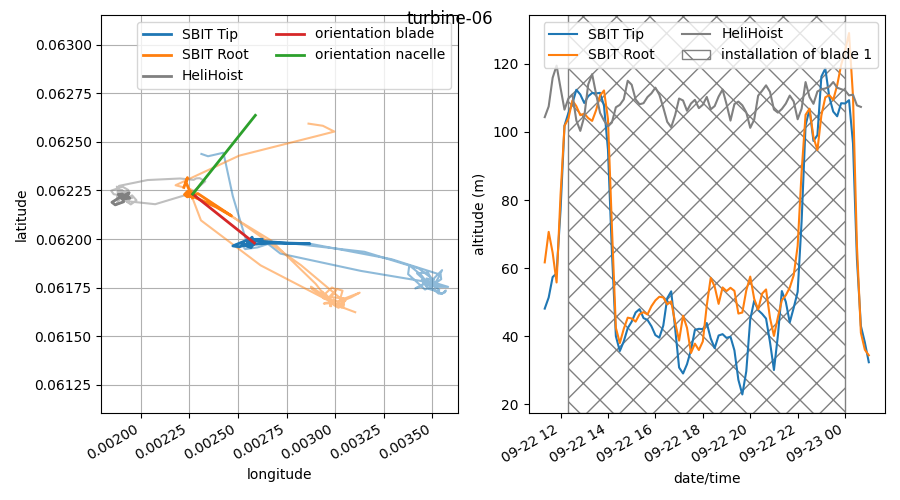

failed to identify installation times for turbine-07... skipping
turbine-08 single blade installation start 2019-10-14 12:50:00+00:00 to 2019-10-16 02:40:00+00:00
sbit vector: (0.00034023640217004623, -0.0002229097710061967)
nacelle orientation due north: 33


<IPython.core.display.Javascript object>


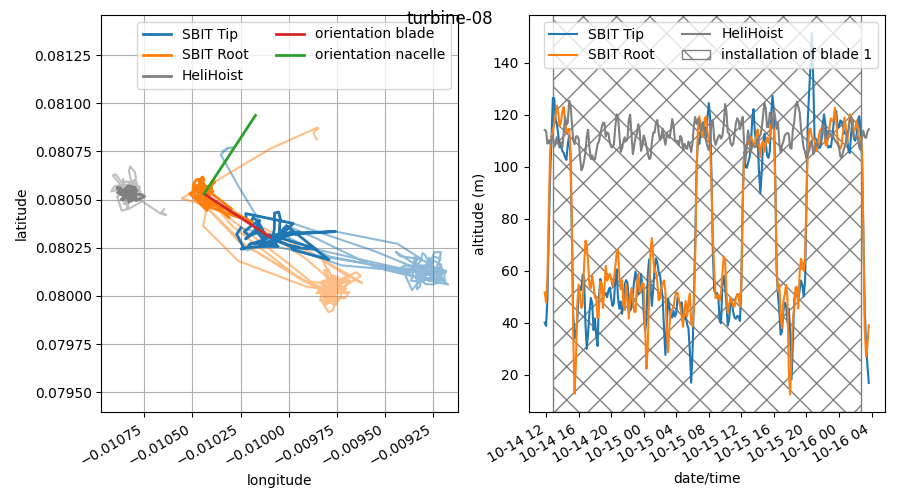

* no helihoist data available! proceed with caution
turbine-09 single blade installation start 2019-10-17 07:10:00+00:00 to 2019-10-17 23:30:00+00:00
sbit vector: (0.000316125223547575, -0.00021216084939146285)
nacelle orientation due north: 34


<IPython.core.display.Javascript object>


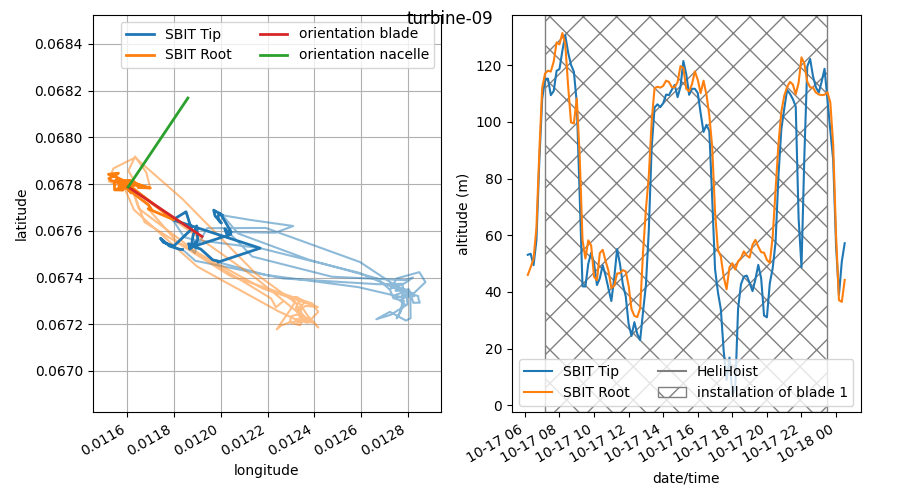

* no helihoist data available, skipping
turbine-10 single blade installation start 2019-10-23 20:10:00+00:00 to 2019-10-23 20:10:00+00:00
sbit vector: (0.00045676577824280834, -0.0003167863133491794)
nacelle orientation due north: 35


../src/mythicwind/gps.py:135: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  ax1.plot(sbitroot_gps[start:stop].longitude,


<IPython.core.display.Javascript object>


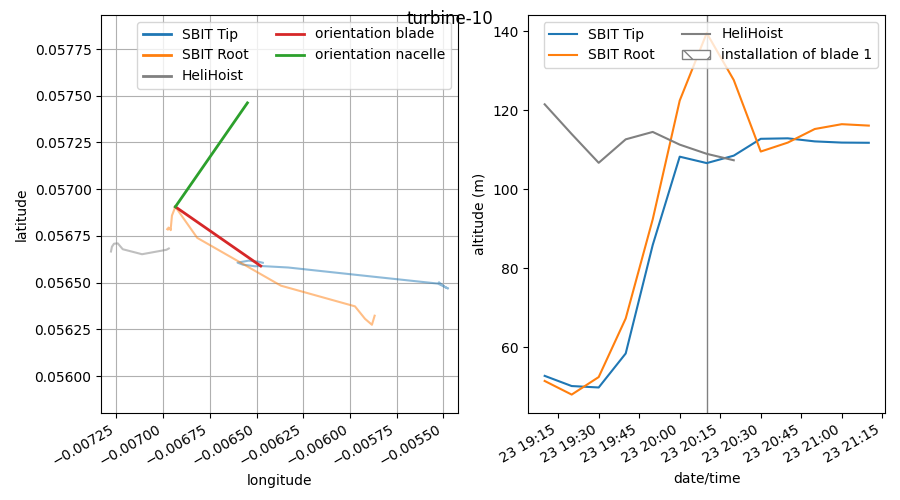

turbine-11 single blade installation start 2019-10-31 11:30:00+00:00 to 2019-10-31 18:30:00+00:00
sbit vector: (-3.3339996560325866e-05, 0.00035709911286706253)
substracting 360 degrees
nacelle orientation due north: 265


../src/mythicwind/gps.py:135: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  ax1.plot(sbitroot_gps[start:stop].longitude,


<IPython.core.display.Javascript object>


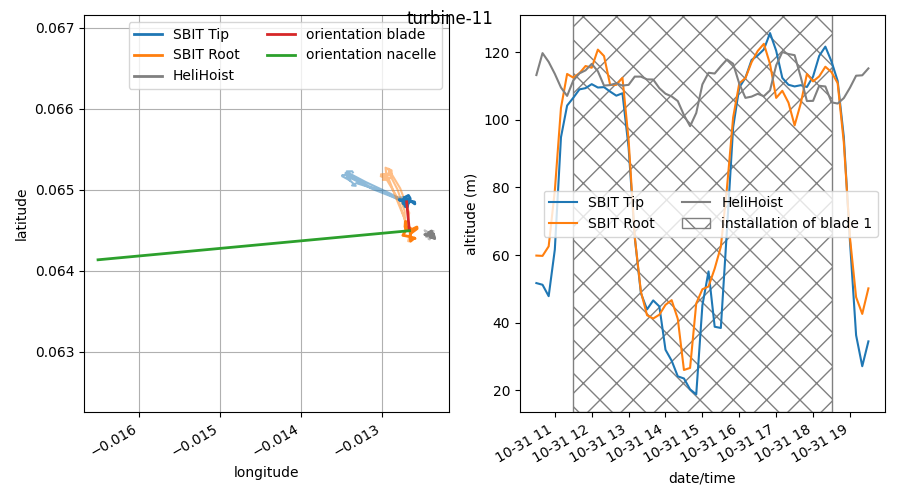

turbine-12 single blade installation start 2019-11-05 04:30:00+00:00 to 2019-11-05 06:30:00+00:00
sbit vector: (0.0004898024080161704, 0.00010949186244119113)
substracting 360 degrees
nacelle orientation due north: 347


../src/mythicwind/gps.py:135: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  ax1.plot(sbitroot_gps[start:stop].longitude,


<IPython.core.display.Javascript object>


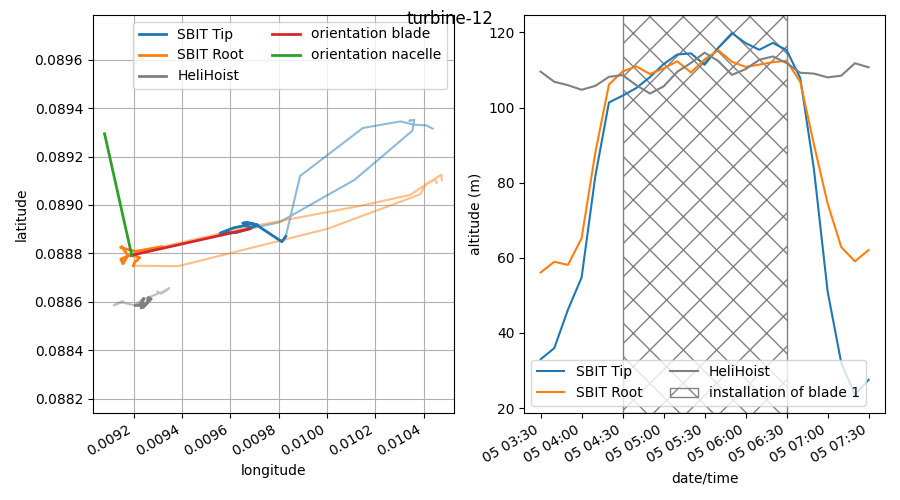

failed to identify installation times for turbine-13... skipping
turbine-14 single blade installation start 2019-11-24 22:00:00+00:00 to 2019-11-25 16:30:00+00:00
sbit vector: (0.0004624993799298427, 0.0001362443083989806)
substracting 360 degrees
nacelle orientation due north: 344


../src/mythicwind/gps.py:135: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  ax1.plot(sbitroot_gps[start:stop].longitude,


<IPython.core.display.Javascript object>


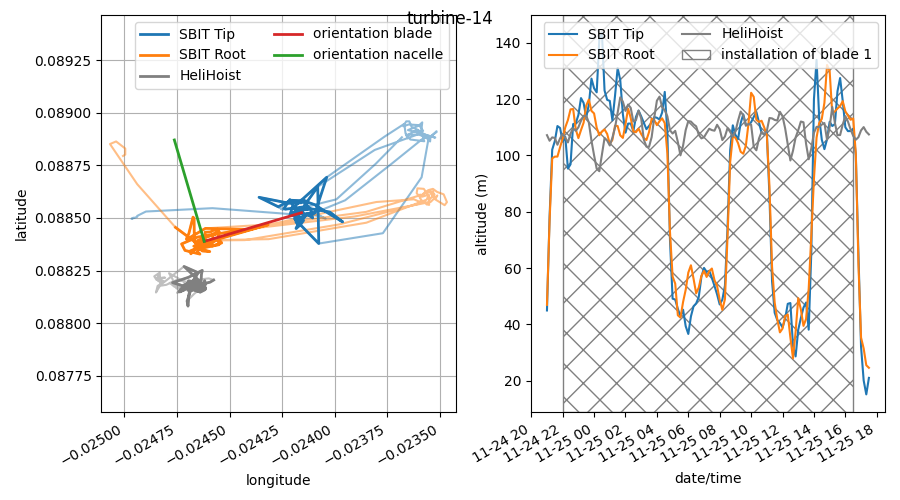

failed to identify installation times for turbine-15... skipping
* no helihoist data available! proceed with caution
turbine-16 single blade installation start 2019-12-22 09:10:00+00:00 to 2019-12-22 18:10:00+00:00
sbit vector: (-0.00035654658504889985, 0.00020485053402505282)
substracting 360 degrees
nacelle orientation due north: 210


../src/mythicwind/gps.py:135: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  ax1.plot(sbitroot_gps[start:stop].longitude,


<IPython.core.display.Javascript object>


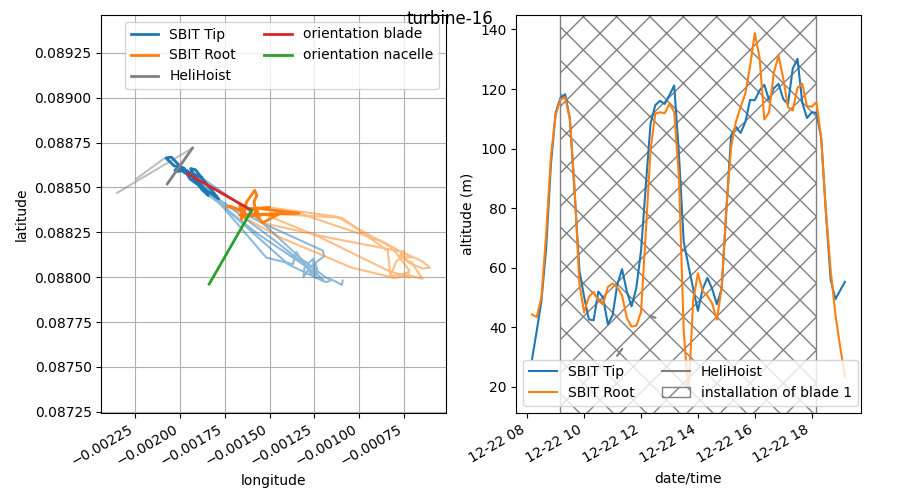

In [85]:
orientation_file = open(path.join(data_dir, 'nacelle_orientations.csv'), 'w')
orientation_file.writelines('turbine,orientation\n')

for name, turbine in turbines_gps_files.items():
    
    hh, sr, st, ii = estimate_sbi(helihoist=turbine['helihoist-1'],
                                  sbitroot=turbine['sbitroot'],
                                  sbittip=turbine['sbittip']
                                 )
    if not len(ii) > 0:
        print(f'failed to identify installation times for {name}... skipping')
        continue
    
    with open(path.join(path.join(data_dir, name), f'{name}_sbi-installation-times.csv'), 'w') as sbi_outfile:
        sbi_outfile.write(f'sbi_times\n')
        for t in ii.astype('int64').to_numpy()/1.0e9:
            sbi_outfile.write(f'{t}\n')
        
    
    sbi_start = ii[0]
    sbi_stop = ii[-1]
    
    print(f'{name} single blade installation start {sbi_start} to {sbi_stop}')
    
    sbitroot_v, sbit_v, nacelle_v, nacelle_angle = estimate_nacelle_orientation(sbitroot_gps=sr,
                                                                                sbittip_gps=st,
                                                                                sbi_time_index=ii,
                                                                               )
        
    plot_sbi(sbitroot_gps=sr,
             sbittip_gps=st,
             helihoist_gps=hh,
             sbitroot_v=sbitroot_v,
             sbit_v=sbit_v,
             nacelle_v=nacelle_v,
             sbi_time_indices=ii,
             turbine_name=name,
            )
    
    orientation_file.write(f'{name},{nacelle_angle:.0f}\n')
orientation_file.close()

In [68]:
hh, sr, st, ii = estimate_sbi(helihoist=turbine['helihoist-1'],
                                  sbitroot=turbine['sbitroot'],
                                  sbittip=turbine['sbittip']
                                 )

* no helihoist data available! proceed with caution


In [83]:
ii.astype('int64').to_numpy()/1.0e9

array([1.5770058e+09, 1.5770064e+09, 1.5770070e+09, 1.5770178e+09,
       1.5770184e+09, 1.5770190e+09, 1.5770196e+09, 1.5770202e+09,
       1.5770274e+09, 1.5770280e+09, 1.5770286e+09, 1.5770292e+09,
       1.5770298e+09, 1.5770304e+09, 1.5770310e+09, 1.5770316e+09,
       1.5770322e+09, 1.5770328e+09, 1.5770334e+09, 1.5770340e+09,
       1.5770346e+09, 1.5770352e+09, 1.5770358e+09, 1.5770364e+09,
       1.5770370e+09, 1.5770376e+09, 1.5770382e+09])